<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이학습


In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

model = MobileNetV2()
model.summary()

14540800/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________

In [ ]:
tf.keras.utils.plot_model(model)

In [2]:
x = model.layers[-2].output
x

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [4]:
den1 = tf.keras.layers.Dense(120, activation ='softmax')(x)

In [5]:
model= tf.keras.Model(inputs=model.input, outputs=den1)
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentroy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [6]:
import numpy as np
#가중치 초기화
for layer in model.layers[:-1]:
  layer.trainable = True

#layer에서 kernel은 가중치 w를 말한다.
for layer in model.layers[:-1]:
  if 'kernel' in layer.__dict__:
    kernel_shape = np.array(layer.get_weights()).shape#가중치 shape 가져오기
    layer.set_weights(tf.random.normal(kernel_shape, 0,1))#가중치 초기화

In [7]:
#가중치 뒤에서 20개는 훈련 가능, 나머지는 가중치 고정
for layer in model.layers[:-20]:
  layer.trainable = False
for layer in model.layers[-20:]:
  layer.trainable = True

model.compile(optimizer = 'sgd' , loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

## 실습1: 개의 종류를 판별하시오

In [8]:
tf.keras.utils.get_file('/content/labels.csv', 'http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/sample_submission.csv', 'http://bit.ly/2GGnMNd')
tf.keras.utils.get_file('/content/train.zip', 'http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip', 'http://bit.ly/2GHEsnO')

362848256/362841195 [==============================] - 9s 0us/step


'/content/test.zip'

In [ ]:
! unzip train.zip

In [ ]:
! unzip test.zip

In [11]:
import pandas as pd
df_label = pd.read_csv('labels.csv')
df_label .head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [14]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [13]:
df_label['breed'].nunique()

120

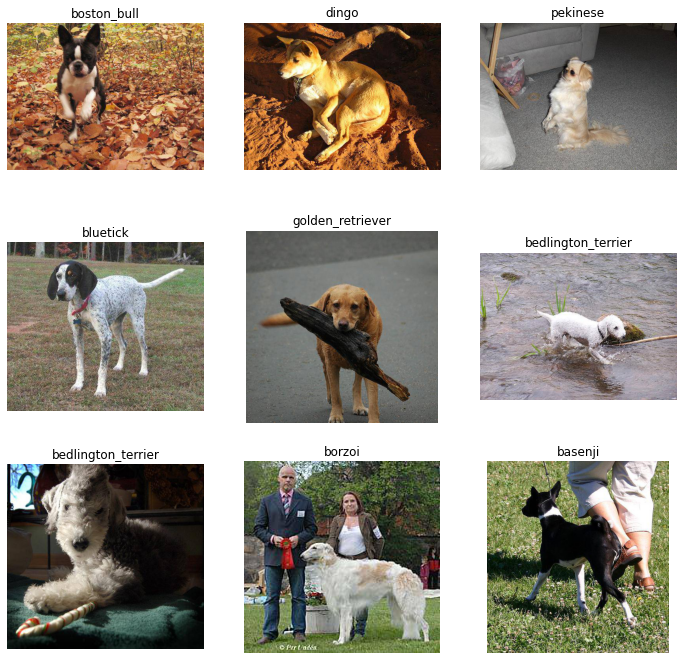

In [19]:
#이미지 출력하기
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in range(9):
  id = df_label.loc[i,'id']
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.imshow(plt.imread('/content/train/'+id+'.jpg'))
  plt.title(df_label.loc[i,'breed'])
plt.show()

In [24]:
import cv2
import numpy as np

X_train = []
for i in range(len(df_label[:100])):
  img = cv2.imread('/content/train/'+df_label['id'][i]+'.jpg')
  img = cv2.resize(img, dsize=(224,224)) #이미지 리사이즈
  img = img/255.0 #정규화
  X_train.append(img)

X_train = np.array(X_train) #numpy array로 변경
X_train.shape

(100, 224, 224, 3)

In [35]:
y_train = df_label['breed'].unique().tolist()
y_train = np.array(y_train)
y_train.shape

(120,)

In [43]:
y_train =[]
for i in df_label['breed'][:100]:
  # y_train.append(df_label['breed'][i])
  y_train.append(unique_Y.index(i))
y_train= np.array(y_train)
y_train.shape

(100,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2()
model.summary()

In [ ]:
x = model.layers[-2].output
den1 = tf.keras.layers.Dense(units=120, activation = 'softmax')(x)
model = tf.keras.Model(inputs= model.input, outputs= den1)
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy" , metrics=['accuracy'])
model.summary()

In [44]:
history= model.fit(X_train,y_train,validation_split= 0.2, batch_size= 32, epochs=5)

Epoch 1/5
3/3 [==============================] - 12s 4s/step - loss: 4.8783 - accuracy: 0.0500 - val_loss: 5.5585 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 11s 4s/step - loss: 0.6129 - accuracy: 1.0000 - val_loss: 6.6279 - val_accuracy: 0.0000e+00
Epoch 3/5
3/3 [==============================] - 11s 4s/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 7.5252 - val_accuracy: 0.0000e+00
Epoch 4/5
3/3 [==============================] - 11s 4s/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 7.8461 - val_accuracy: 0.0000e+00
Epoch 5/5
3/3 [==============================] - 13s 4s/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 8.0596 - val_accuracy: 0.0000e+00


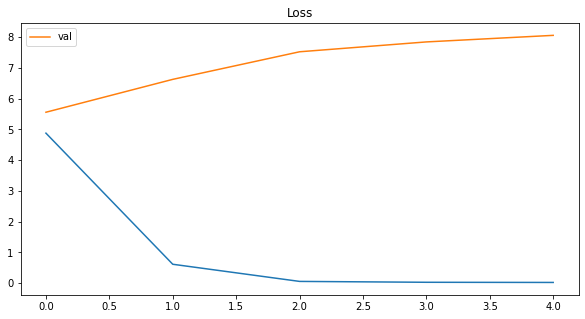

In [47]:
plt.figure(figsize=(10,5))
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],label='val')
plt.legend()

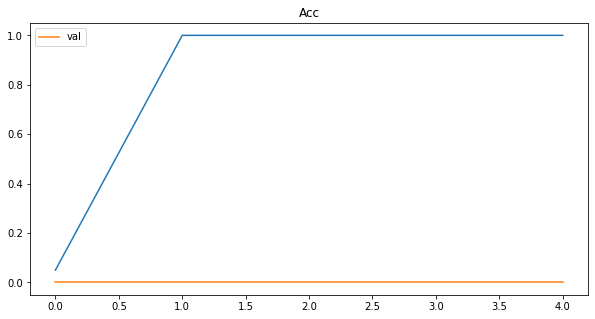

In [48]:
plt.figure(figsize=(10,5))
plt.title('Acc')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

In [49]:
model = MobileNetV2()
x = model.layers[-2].output #기본모델 뒤에서 2번째 지정

den1 = tf.keras.layers.Dense(units=120, activation='softmax')(x)
model = tf.keras.Model(inputs=model.input, outputs=den1)

# 가중치 뒤에서 20개는 훈련 가능, 나머지는 가중치 고정
for layer in model.layers[:-20]:
  layer.trainable = False

for layer in model.layers[-20:]:
  layer.trainable = True

model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [50]:
history2 = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 4.9407 - accuracy: 0.0125 - val_loss: 5.3225 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 3s 986ms/step - loss: 4.0432 - accuracy: 0.1125 - val_loss: 5.2909 - val_accuracy: 0.0500
Epoch 3/10
3/3 [==============================] - 3s 964ms/step - loss: 3.1934 - accuracy: 0.4375 - val_loss: 5.2623 - val_accuracy: 0.0500
Epoch 4/10
3/3 [==============================] - 3s 982ms/step - loss: 2.5059 - accuracy: 0.6750 - val_loss: 5.2318 - val_accuracy: 0.0500
Epoch 5/10
3/3 [==============================] - 3s 961ms/step - loss: 1.9246 - accuracy: 0.8500 - val_loss: 5.2122 - val_accuracy: 0.0500
Epoch 6/10
3/3 [==============================] - 3s 967ms/step - loss: 1.4209 - accuracy: 0.9250 - val_loss: 5.2163 - val_accuracy: 0.0500
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 1.1289 - accuracy: 1.0000 - val_loss: 5.2369 - val_accuracy: 0.0500
Epoch 8/10
3/3 [======

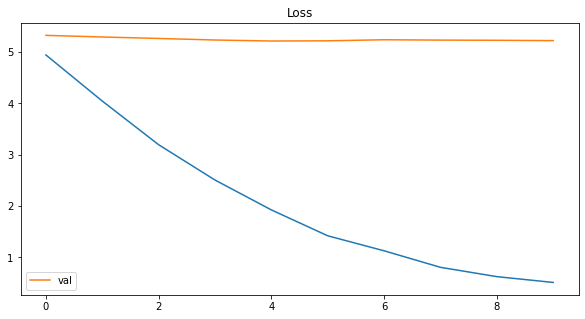

In [51]:
plt.figure(figsize=(10,5))
plt.title('Loss')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'],label='val')
plt.legend()

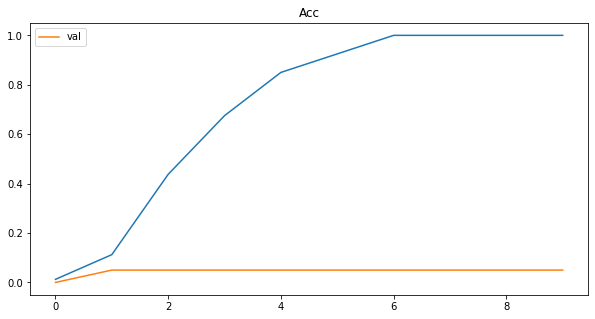

In [52]:
plt.figure(figsize=(10,5))
plt.title('Acc')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'],label='val')
plt.legend()

## 실습2: 이미지를 받아와서 KMean으로 분류하시오

In [72]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True, cache_dir='/content')
data_dir = pathlib.Path(data_dir)

In [73]:
data_dir

PosixPath('/content/datasets/flower_photos')

In [75]:
# image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0) #정규화
# image_data = image_generator.flow_from_directory(str(data_dir), target_size=(128,128)) #리사이즈

Found 3670 images belonging to 5 classes.


In [98]:
file_lists = list(data_dir.glob('*'))

In [100]:
del(file_lists[1])
file_lists

[PosixPath('/content/datasets/flower_photos/dandelion'),
 PosixPath('/content/datasets/flower_photos/tulips'),
 PosixPath('/content/datasets/flower_photos/daisy'),
 PosixPath('/content/datasets/flower_photos/roses'),
 PosixPath('/content/datasets/flower_photos/sunflowers')]

In [107]:
str(file_lists[0])

'/content/datasets/flower_photos/dandelion'

In [231]:
list(file_lists[0].glob('*'))[0]

PosixPath('/content/datasets/flower_photos/dandelion/14128835667_b6a916222c.jpg')

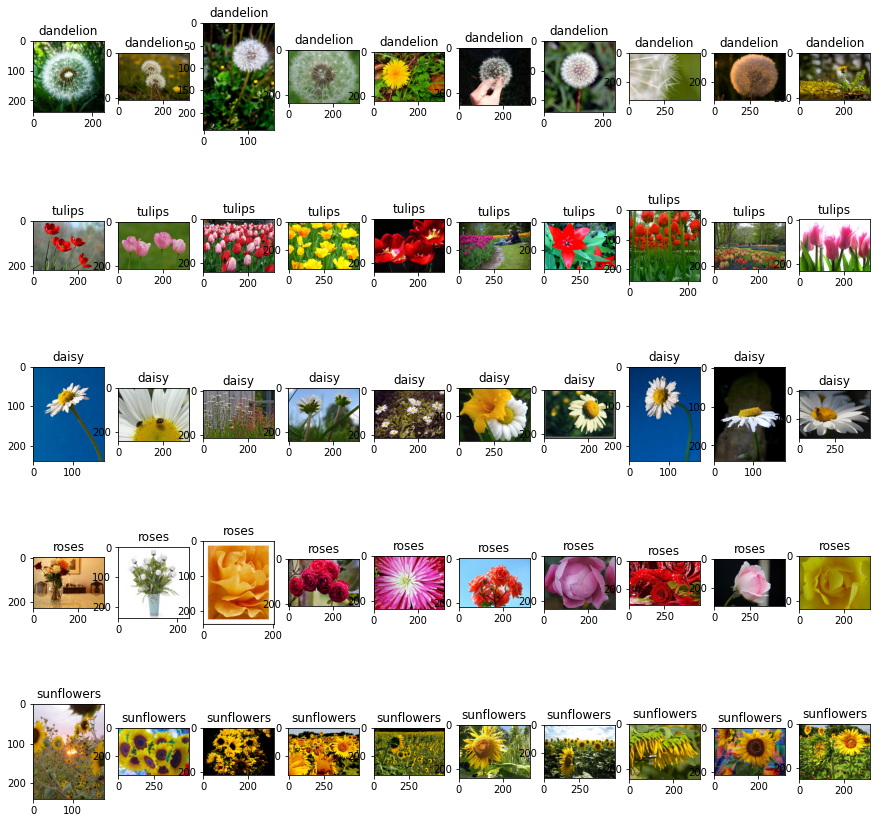

In [214]:
from collections import defaultdict
X_train = []
flowers=defaultdict(list)
plt.figure(figsize=(15,15))
for i,spe in enumerate(file_lists):
  target= list(spe.glob('*'))
  name = str(spe).split('/')[-1]
  candi = []
  for e,t in enumerate(random.sample(target, 10),1):
    plt.subplot(5,10,10*i+e)
    plt.title(name)
    plt.imshow(plt.imread(str(t)))
    candi.append(str(t))
    img = cv2.imread(str(t))
    img = cv2.resize(img, dsize=(128,128)) #이미지 리사이즈
    img = img/255.0 #정규화
    tmp =np.array(img).reshape(128*128*3)
    X_train.append(tmp)
  flowers[name].extend(candi)
plt.show()
X_train = np.array(X_train) #numpy array로 변경
#X_train.shape

In [215]:
X_train.shape

(50, 49152)

- KMeans 적용


In [216]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, init="random", random_state=0).fit(X_train)
model.cluster_centers_

array([[0.54640523, 0.61405229, 0.59771242, ..., 0.20130719, 0.36601307,
        0.45849673],
       [0.71529412, 0.66745098, 0.5945098 , ..., 0.53803922, 0.69098039,
        0.54039216],
       [0.22608696, 0.30093777, 0.285763  , ..., 0.10997442, 0.24808184,
        0.28064791],
       [0.16819172, 0.13507625, 0.0832244 , ..., 0.19259259, 0.16470588,
        0.05751634],
       [0.04705882, 0.07058824, 0.05098039, ..., 0.05490196, 0.20392157,
        0.09019608]])

In [217]:
print(model.labels_)

[2 2 3 0 2 3 3 0 3 2 0 2 2 0 2 2 2 2 2 1 3 1 2 1 2 4 3 3 3 2 0 1 0 2 0 1 2
 2 3 0 0 0 2 0 2 2 0 2 2 2]


In [218]:
flowers

defaultdict(list,
            {'daisy': ['/content/datasets/flower_photos/daisy/5110110938_9da91455c4_m.jpg',
              '/content/datasets/flower_photos/daisy/2828733818_1c1ed0089d_n.jpg',
              '/content/datasets/flower_photos/daisy/799964360_7e07a227ea_n.jpg',
              '/content/datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg',
              '/content/datasets/flower_photos/daisy/5739768868_9f982684f9_n.jpg',
              '/content/datasets/flower_photos/daisy/519880292_7a3a6c6b69.jpg',
              '/content/datasets/flower_photos/daisy/3640845041_80a92c4205_n.jpg',
              '/content/datasets/flower_photos/daisy/5110107234_12ddc0206b_m.jpg',
              '/content/datasets/flower_photos/daisy/2579018590_74359dcf1a_m.jpg',
              '/content/datasets/flower_photos/daisy/14523675369_97c31d0b5b.jpg'],
             'dandelion': ['/content/datasets/flower_photos/dandelion/5875763050_82f32f2eed_m.jpg',
              '/content/datasets/flower_photos/d

- 결과

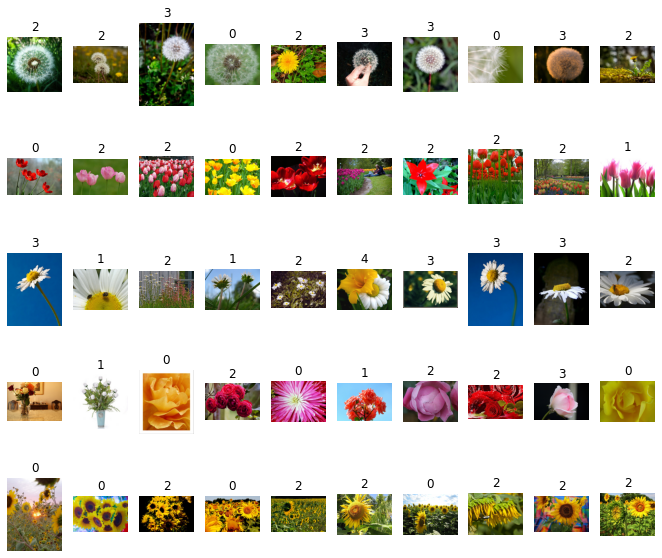

In [241]:
plt.figure(figsize=(15,10))
labels =model.labels_
i = 0
e= 1
for k,v in flowers.items():
  for vv in v:
    plt.subplot(5,10,e)
    plt.subplots_adjust(left=0.3)
    plt.title(labels[i])
    plt.imshow(plt.imread(str(vv)))
    plt.axis('off')
    i+=1
    e+=1
 